In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("C:/Users/santi/Downloads/Corsi - Hoja 4.csv")
df_anova = pd.read_csv("C:/Users/santi/Downloads/Corsi - Hoja 3.csv")
df_HM = pd.read_csv("C:/Users/santi/Downloads/Corsi - Hombres vs Mujeres.csv")
df_mate= pd.read_csv("C:/Users/santi/Downloads/Corsi - Hoja 6.csv")

In [3]:
df

,Mate/Mujer,Mate/Hombre,No_Mate/Hombre,No_mate/Mujer
0,5,4,7,6
1,5,6,5,5
2,6,5,6,5
3,8,7,6,6
4,5,6,6,5
5,5,6,6,6
6,6,8,6,2


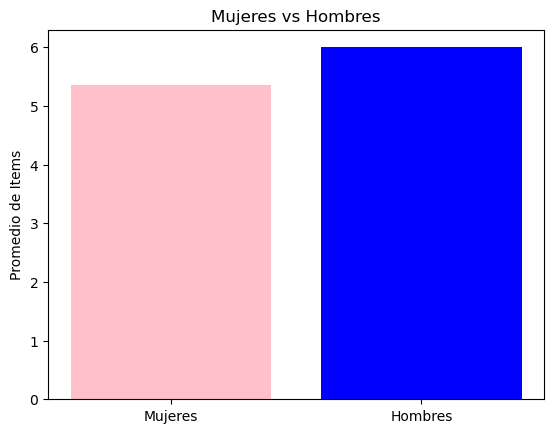

In [4]:
mean_values = df_HM.mean()

# Create a list of colors for each bar
colors = ['pink' if col == 'Mujeres' else 'blue' for col in mean_values.index]

# Plot a bar graph of the mean values with colors
plt.bar(mean_values.index, mean_values.values, color=colors)

# Set the y-axis label
plt.ylabel('Promedio de Items')

# Set the title of the graph
plt.title('Mujeres vs Hombres')

# Display the graph
plt.show()


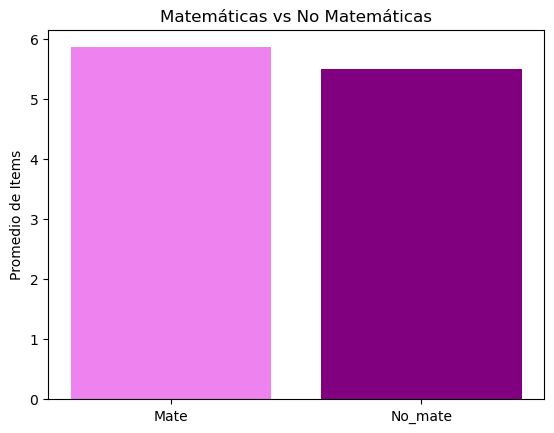

In [5]:
mean_values = df_mate.mean()

# Create a list of colors for each bar
colors = ['violet' if col == 'Mate' else 'purple' for col in mean_values.index]

# Plot a bar graph of the mean values with colors
plt.bar(mean_values.index, mean_values.values, color=colors)

# Set the y-axis label
plt.ylabel('Promedio de Items')

# Set the title of the graph
plt.title('Matemáticas vs No Matemáticas')

# Display the graph
plt.show()


In [6]:
# Supuestos ANOVA Factorial
# Test normality for each group
for group in df.columns:
    _, p_value = stats.shapiro(df[group].dropna())
    print(f"Shapiro-Wilk Test for {group}: p-value = {p_value:.4f}")

# Test homogeneity of variances using Levene's test
_, p_value = stats.levene(*[df[group].dropna() for group in df.columns])
print(f"Levene's Test: p-value = {p_value:.4f}")




Shapiro-Wilk Test for Mate/Mujer: p-value = 0.0062
Shapiro-Wilk Test for Mate/Hombre: p-value = 0.8192
Shapiro-Wilk Test for No_Mate/Hombre: p-value = 0.0238
Shapiro-Wilk Test for No_mate/Mujer: p-value = 0.0059
Levene's Test: p-value = 0.6230


In [7]:
# ANOVA Factorial

model = ols('Puntaje ~ C(Sexo) * C(Carrera)', data=df_anova).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the results
print(anova_table)

                       sum_sq    df         F    PR(>F)
C(Sexo)              2.892857   1.0  2.209091  0.150219
C(Carrera)           0.892857   1.0  0.681818  0.417094
C(Sexo):C(Carrera)   0.892857   1.0  0.681818  0.417094
Residual            31.428571  24.0       NaN       NaN


In [8]:
df

,Mate/Mujer,Mate/Hombre,No_Mate/Hombre,No_mate/Mujer
0,5,4,7,6
1,5,6,5,5
2,6,5,6,5
3,8,7,6,6
4,5,6,6,5
5,5,6,6,6
6,6,8,6,2


In [9]:
# Comparaciones Múltiples

tukey_results = pairwise_tukeyhsd(df_anova['Puntaje'].dropna(),
                                   df_anova['Sexo'].dropna(),
                                   alpha=0.05)
print(tukey_results)
# Comparaciones Múltiples

tukey_results = pairwise_tukeyhsd(df_anova['Puntaje'].dropna(),
                                   df_anova['Carrera'].dropna(),
                                   alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
Hombre  Mujer  -0.6429 0.1444 -1.521 0.2353  False
--------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj   lower  upper reject
---------------------------------------------------
  mate no_mate  -0.3571 0.4242 -1.2613 0.547  False
---------------------------------------------------
